### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1688]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems
Use the prompts below to get started with your data analysis.  
1. Read in the `coupons.csv` file.

In [217]:
data = pd.read_csv('data/coupons.csv')

In [219]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [301]:
#copying data to another dataframe df incase we need to compare against intial dataframe 'data'.
df = data

3. Decide what to do about your missing data -- drop, replace, other...

In [257]:
#Looking at column car for null values to see whether we should populate it with data or drop it. 
#It looks like the passenger field is filled but since the question is not dependent on whether a person drives
# but takes into consideration what their option would be if they drove.
data.loc[data.isnull()['car']][['passanger', 'car']].groupby('passanger').count()

,car
passanger,
Alone,0
Friend(s),0
Kid(s),0
Partner,0


In [259]:
#Getting the unique values of the car column to see if it could be filled.
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [251]:
#Decided to drop this column as the dataset was for all drivers and analysis isn't dwelling on the mode of transport but 
#rather focussed on the passenger type they carry this columns doesn't seem to hold any value
df = df.drop('car', axis=1)

In [265]:
#rename the passenger column to correct the spelling
df.rename(columns={'passanger':'passenger'})

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [205]:
#Querying data to see if column has NaNs
data.query('Restaurant20To50.isna()')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,0,1,1
12301,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,1,0,1
12302,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,0,0,1,0
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,1,0,1,0


In [299]:
#filtering main data for specific columns based on column 'Bar'
data.loc[data.isnull()['Bar']][['Bar', 'CoffeeHouse', 'CarryAway','Y']]

,Bar,CoffeeHouse,CarryAway,Y
517,NaN,NaN,NaN,0
518,NaN,NaN,NaN,0
519,NaN,NaN,NaN,1
520,NaN,NaN,NaN,0
521,NaN,NaN,NaN,1
...,...,...,...,...
12168,NaN,less1,gt8,0
12169,NaN,less1,gt8,0
12170,NaN,less1,gt8,1
12171,NaN,less1,gt8,0


In [307]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [305]:
#Filling all the NaN values in column 'Bar' to '0' assuming that folks didn't respond since they didn't go.
df['Bar']=df['Bar'].fillna('0')

In [343]:
#getting the unique values for the column 'Bar'
df['Bar'].unique()

array(['0', '1~3', '8+', '4~8'], dtype=object)

In [341]:
#Manipulating certain values to make more sense for analyis
df['Bar']=df['Bar'].replace({'never':'0'}).replace({'less1':'0'}).replace({'8~9':'8+'})

In [367]:
#Replacing and assinging the main dfs where these two columns are NaN. 
df[['CarryAway', 'CoffeeHouse']]=df[['CarryAway', 'CoffeeHouse']].fillna('0')

In [385]:
df['CarryAway'].unique()

array(['0', '4~8', '1~3', '8+'], dtype=object)

In [1007]:
#Trying to see if I can replace the values in all these columns to the ones used in the 'Bar' column.
df[['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20']]=df[['CoffeeHouse', 'CarryAway','RestaurantLessThan20']].replace({'never':'0'}).replace({'less1':'0'}).replace({'gt8':'8+'})

4. What proportion of the total observations chose to accept the coupon? 



In [1754]:
#Intial attempt at finding the total observations that choose to accept the coupon.
proportion = df.query('Y == 1')['Y'].count()/df['Y'].count()*100
print(f"Proportion of total observations that chose to accept the coupon:{proportion:.2f}%")

Proportion of total observations that chose to accept the coupon:56.84%


5. Use a bar plot to visualize the `coupon` column.

In [1368]:
#creating a df to plot the graph. 
# used a different method below once I realized I could use value counts instead to get the df directly
df1 = df.groupby('Y')[['Y']].count().rename(columns={'Y':'Count of Y'}).reset_index()
df1

,Y,Count of Y
0,0,5474
1,1,7210


Text(0.5, 1.0, 'Accepted vs Rejected C')

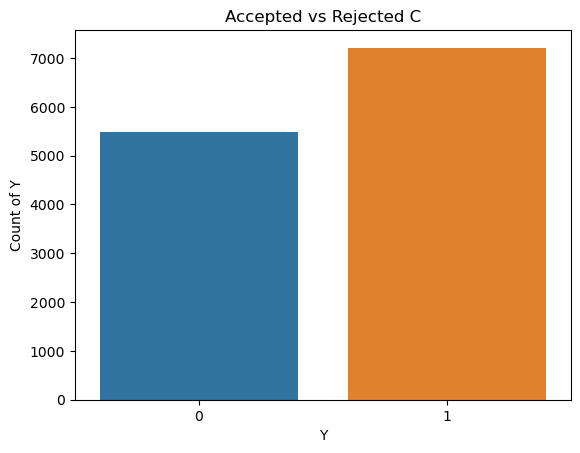

In [1831]:
#Visualization based on renaming columns. Test output. Using method2 for final analysis.
sns.barplot(df1, x= 'Y', y='Count of Y')
plt.title('Accepted vs Rejected C')

   Y  count
0  0   5474
1  1   7210


Text(0.5, 1.0, 'Coupons accepted vs denied')

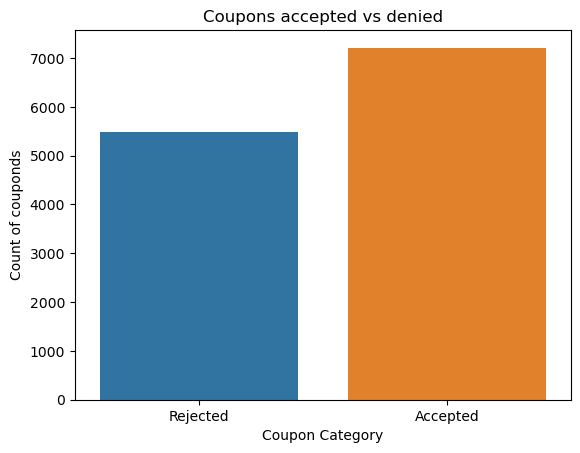

In [1390]:
#method 2 using value counts directly, simple and clean.
coupon = df.groupby('Y')['Y'].value_counts().reset_index()
print(coupon)
new_label=['Rejected','Accepted']
sns.barplot(coupon, x='Y', y='count').set_xticklabels(new_label)
plt.xlabel('Coupon Category')
plt.ylabel('Count of couponds')
plt.title('Coupons accepted vs denied')

6. Use a histogram to visualize the temperature column.

In [1808]:
temp_df=df['temperature']

D:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribution of Temperature')

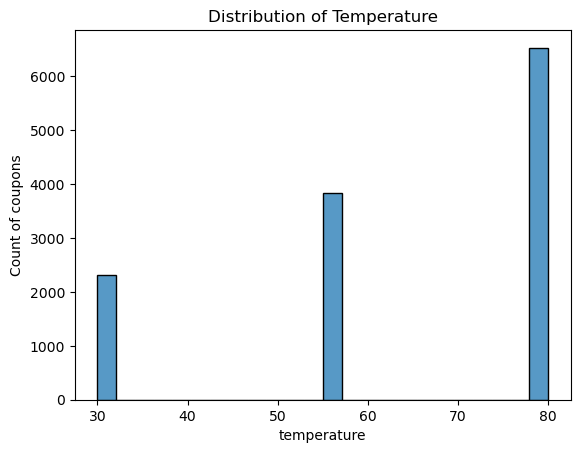

In [1835]:
#creating a histplot for the column temperature
#trying to see if inf values can be chnage to NaN, but didn't work.
df['temperature'] = df['temperature'].replace([np.inf, -np.inf], np.nan) 
sns.histplot(temp_df)
plt.ylabel('Count of coupons')
plt.title('Distribution of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1632]:
#creating a df just for bar coupons
bar_coupons_df = df.query('coupon == "Bar"')
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,0,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,0,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [1814]:
#calculating the proportion of coupons that were accepted
barCoupon_accepted = bar_coupons_df.query('Y == 1')['Y'].count()/len(bar_coupons_df)*100
print(f"Proportion of bar coupons were accepted: {barCoupon_accepted:.2f}%")

Proportion of bar coupons were accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [685]:
#Manipulating all the data points in the "Bar" column to greater than 3 or less than an equal to 3 to simplify analysis
bar_coupons_df.loc[:'Bar'][['Bar']] =bar_coupons_df.loc[:'Bar'][['Bar']].replace({'0':'<=3'}).replace({'1~3':'<=3'}).replace({'4~8':'>3'}).replace({'8+':'>3'})
bar_coupons_df.groupby('Bar')['Bar'].count()

Bar
<=3    1818
>3      199
Name: Bar, dtype: int64

In [687]:
#Validating if the replace function worked appropriately
df.query('coupon == "Bar"').groupby('Bar')['Bar'].count()

Bar
0      1421
1~3     397
4~8     150
8+       49
Name: Bar, dtype: int64

In [939]:
#calculating the percentage of accepted coupons between the two groups
acc_rate_3orLess = bar_coupons_df[(bar_coupons_df['Y']==1) & (bar_coupons_df['Bar']=='<=3')]['Y'].count()/bar_coupons_df[bar_coupons_df['Bar']=='<=3']['Y'].count()*100
acc_rate_gt3 = bar_coupons_df[(bar_coupons_df['Y']==1) & (bar_coupons_df['Bar']=='>3')]['Y'].count()/bar_coupons_df[bar_coupons_df['Bar']=='>3']['Y'].count()*100
print(f"Acceptance rate, 3 or fewer times a month: {acc_rate_3orLess:.2f}%")
print(f"Acceptance rate, more than 3 times a month: {acc_rate_gt3:.2f}%")

Acceptance rate, 3 or fewer times a month: 37.07%
Acceptance rate, more than 3 times a month: 76.88%


In [937]:
#Validating using alternate method by using query
acc_rate_3orLess_query = bar_coupons_df.query('Y == 1 & Bar == "<=3"')['Y'].count()/bar_coupons_df.query('Bar == "<=3"')['Y'].count()*100
acc_rate_gt3_query = bar_coupons_df.query('Y == 1 & Bar == ">3"')['Y'].count()/bar_coupons_df.query('Bar == ">3"')['Y'].count()*100
print(f"Acceptance rate, 3 or fewer times a month: {acc_rate_3orLess_query:.2f}%")
print(f"Acceptance rate, more than 3 times a month: {acc_rate_gt3_query:.2f}%")

Acceptance rate, 3 or fewer times a month: 37.07%
Acceptance rate, more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [1011]:
#Creating another df copy for just bar coupons without the manipulation above.
bar_coupons_df1 = df.query('coupon == "Bar"')

In [955]:
#Finding the unique values
bar_coupons_df1['Bar'].unique()

array(['0', '1~3', '8+', '4~8'], dtype=object)

In [959]:
bar_coupons_df1['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [963]:
#Validating the query to be used for calculation
bar_coupons_df1.query('Bar == "0" or (age in ("21","below21"))')['Y'].count()

1597

In [951]:
bar_coupons_df1.query('Bar != "0" & (age not in ("21" ,"below21"))')['Y'].count()

420

In [967]:
#Calculating the accepteance rate for drivers over the age of 25 and below based on their visits to the bar
acc_rate_barAge25over = bar_coupons_df1.query('Bar != "0" & (age not in ("21" ,"below21")) & Y == 1')['Y'].count()/bar_coupons_df1.query('Bar != "0" & (age not in ("21" ,"below21"))')['Y'].count()*100
acc_rate_barAge25nunder = bar_coupons_df1.query('(Bar == "0" or (age in ("21","below21"))) & Y == 1')['Y'].count()/bar_coupons_df1.query('Bar == "0" or (age in ("21","below21"))')['Y'].count()*100
print(f"Acceptance rate for folks over the age of 25: {acc_rate_barAge25over:.2f}%")
print(f"Acceptance rate for folks aged 25 and under: {acc_rate_barAge25nunder:.2f}%")

Acceptance rate for folks over the age of 25: 69.52%
Acceptance rate for folks aged 25 and under: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [843]:
#Getting the unique values for passengers present in the df.
bar_coupons_df1['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [979]:
#Validating the query and deiciding whether to just use "Kid(s)" or include "Alone" as well
bar_coupons_df1.query('Bar =="0" or passanger == "Kid(s)" or occupation in ("Farming Fishing & Forestry")')['Y'].count()

1466

In [1342]:
#calculating the acceptance rates for both groups.
barNoKidnOccup_rate = bar_coupons_df1.query('Bar !="0" & passanger not in ["Kid(s)","Alone"] & occupation not in ("Farming Fishing & Forestry") and Y==1')['Y'].count()/bar_coupons_df1.query('Bar !="0" & passanger not in ["Kid(s)","Alone"] & occupation not in ("Farming Fishing & Forestry")')['Y'].count()*100
barKidnOccup_rate = bar_coupons_df1.query('(Bar =="0" or passanger in ["Kid(s)","Alone"] or occupation in ("Farming Fishing & Forestry")) and Y==1')['Y'].count()/bar_coupons_df1.query('Bar =="0" or passanger in ["Kid(s)","Alone"] or occupation in ("Farming Fishing & Forestry")')['Y'].count()*100
print(f"Acceptance rate with no kids: {barNoKidnOccup_rate:.2f}%")
print(f"Acceptance rate all others: {barKidnOccup_rate:.2f}%")

Acceptance rate with no kids: 71.79%
Acceptance rate all others: 37.71%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [1015]:
#getting the unique for the income values in the dataset
bar_coupons_df1['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [1013]:
bar_coupons_df1.groupby('RestaurantLessThan20').count()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
RestaurantLessThan20,,,,,,,,,,,,,,,,,,,,,
0,362,362,362,362,362,362,362,362,362,362,...,362,362,362,356,362,362,362,362,362,362
1~3,878,878,878,878,878,878,878,878,878,878,...,878,878,878,860,878,878,878,878,878,878
4~8,568,568,568,568,568,568,568,568,568,568,...,568,568,568,565,568,568,568,568,568,568
8+,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186


In [1344]:
#creating a definition to create groups based on feedback, learning the .apply method.
def group(row):
    if (row['Bar'] not in ('0') and row['passanger'] not in ['Kid(s)','Alone'] and row['maritalStatus'] not in ('Widowed')) or (row['Bar'] != '0' and row['age'] in ('21', '26','below21')) or (row['RestaurantLessThan20'] in ('4~8','8+') and row['income'] in ('Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999') ):
        return "Group1"
    else:
        return "Group2"

bar_coupons_df1.loc[:,'Group']=bar_coupons_df1.apply(group, axis=1)
#print(bar_coupons_df1)

In [1346]:
#calculating the acceptance rates between both groups, this time using the grouping method by callling a function
accptRate_gp1 = bar_coupons_df1.query('Group == "Group1" and Y == 1')['Y'].count()/bar_coupons_df1.query('Group == "Group1"')['Y'].count()*100
accptRate_gp2 = bar_coupons_df1.query('Group == "Group2" and Y == 1')['Y'].count()/bar_coupons_df1.query('Group == "Group2"')['Y'].count()*100
print(f"Acceptance rate Group1: {accptRate_gp1:.2f}%")
print(f"Acceptance rate Group2: {accptRate_gp2:.2f}%")

Acceptance rate Group1: 56.93%
Acceptance rate Group2: 33.19%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers that were in the following groups were the ones that were more probable to accept the coupons
1. Drivers who visited the bar more than 3 times a months.
2. Drivers who visited the bar more than once and over the age of 25
3. Drivers who had no kids and wasn't alone, visited the bar more than once and were not widowed and above 25.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the coffee house.

In [1054]:
cfhouse_coupons_df = df.query('coupon == "Coffee House"')
cfhouse_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,0,4~8,8+,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,0,4~8,8+,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,0,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,0,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of coffee house coupons were accepted?

In [1062]:
#calculating the proportion of coupons that were accepted.
cfhouse_accepted = cfhouse_coupons_df.query('Y == 1')['Y'].count()/len(cfhouse_coupons_df)*100
print(f"Coupons accepted that were coffee house: {cfhouse_accepted:.2f}%")

Coupons accepted that were coffee house: 49.92%


3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [1071]:
cfhouse_coupons_df['CoffeeHouse'].unique()

array(['0', '4~8', '1~3', '8+'], dtype=object)

In [1073]:
cfhouse_coupons_df.groupby('CoffeeHouse')['CoffeeHouse'].count()

CoffeeHouse
0      2074
1~3    1042
4~8     538
8+      342
Name: CoffeeHouse, dtype: int64

In [1819]:
#calculating the acceptance rates based on the number of visit
#instead of grouping, using query to get the required subset of data
ch_acc_rate_3orLess = cfhouse_coupons_df.query('CoffeeHouse in ("0","1~3") & Y == 1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse in ("0","1~3")')['Y'].count()*100
ch_acc_rate_gt3 = cfhouse_coupons_df.query('CoffeeHouse in ("4~8","8+") & Y == 1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse in ("4~8","8+")')['Y'].count()*100
print(f"Acceptance rate, 3 or fewer times a month: {ch_acc_rate_3orLess:.2f}%")
print(f"Acceptance rate, more than 3 times a month: {ch_acc_rate_gt3:.2f}%")

Acceptance rate, 3 or fewer times a month: 44.96%
Acceptance rate, more than 3 times a month: 67.50%


4. Compare the acceptance rate between drivers who go to a coffee more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [1126]:
#getting the unique values to be used in the query below
cfhouse_coupons_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [1128]:
#calculating the acceptance rates based on age based on if they've visited a coffee house.
ch_acc_rate_barAge25over = cfhouse_coupons_df.query('CoffeeHouse != "0" & (age not in ("21" ,"below21")) & Y == 1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse != "0" & (age not in ("21" ,"below21"))')['Y'].count()*100
ch_acc_rate_barAge25nunder = cfhouse_coupons_df.query('(CoffeeHouse == "0" or (age in ("21","below21"))) & Y == 1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse == "0" or (age in ("21","below21"))')['Y'].count()*100
print(f"Acceptance rate for folks over the age of 25: {ch_acc_rate_barAge25over:.2f}%")
print(f"Acceptance rate for folks aged 25 and under: {ch_acc_rate_barAge25nunder:.2f}%")

Acceptance rate for folks over the age of 25: 63.84%
Acceptance rate for folks aged 25 and under: 42.76%


5. Use the same process to compare the acceptance rate between drivers who go to coffee house more than once a month and were retired to all others.

In [1751]:
#getting the unique value of passengers and occuption to create a group to analyze.
cfhouse_coupons_df['passanger'].unique()

array(['Friend(s)', 'Kid(s)', 'Alone', 'Partner'], dtype=object)

In [1134]:
cfhouse_coupons_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [1142]:
#calcualing the acceptance rate based on if they've visited the coffee house and retired to all other groups
ch_retired_occup_rate = cfhouse_coupons_df.query('CoffeeHouse !="0" & occupation in ("Retired") and Y==1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse !="0" & occupation in ("Retired")')['Y'].count()*100
ch_notRetired_occup_rate = cfhouse_coupons_df.query('(CoffeeHouse =="0" or occupation not in ("Retired")) and Y==1')['Y'].count()/cfhouse_coupons_df.query('CoffeeHouse =="0" or occupation not in ("Retired")')['Y'].count()*100
print(f"Acceptance rate for retired: {ch_retired_occup_rate:.2f}%")
print(f"Acceptance rate all others: {ch_notRetired_occup_rate:.2f}%")

Acceptance rate for retired: 64.15%
Acceptance rate all others: 49.73%


6. Compare the acceptance rates between those drivers who:

- go to coffee house more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffee house more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [1348]:
#Creating a function to creating two groups based on the conditions set above
def group(row):
    if (row['CoffeeHouse'] not in ('0') and row['passanger'] not in ("Kid(s)","Alone") and row['maritalStatus'] not in ('Widowed')) or (row['CoffeeHouse'] != '0' and row['age'] in ('21', '26','below21')) or (row['RestaurantLessThan20'] in ('4~8','8+') and row['income'] in ('Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999') ):
        return "Group1"
    else:
        return "Group2"

cfhouse_coupons_df.loc[:,'Group']=cfhouse_coupons_df.apply(group, axis=1)
#print(cfhouse_coupons_df)

In [1350]:
#Note: Calculating the acceptance rates based on the group conditions set above.

ch_accptRate_gp1 = cfhouse_coupons_df.query('Group == "Group1" and Y == 1')['Y'].count()/cfhouse_coupons_df.query('Group == "Group1"')['Y'].count()*100
ch_accptRate_gp2 = cfhouse_coupons_df.query('Group == "Group2" and Y == 1')['Y'].count()/cfhouse_coupons_df.query('Group == "Group2"')['Y'].count()*100
print(f"Acceptance rate Group1: {ch_accptRate_gp1:.2f}%")
print(f"Acceptance rate Group2: {ch_accptRate_gp2:.2f}%")

Acceptance rate Group1: 64.00%
Acceptance rate Group2: 39.47%


### Additional Analysis
Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? 

In [1234]:
#Since Y=1 is set for drivers that accept the coupon and Y=0 is set for driveres that don't understanding
#the ratio between both would help us understand the proportion for folks going in the opposite direction
df5= df.query('direction_opp == 1')[['Y']].value_counts(normalize=True).reset_index()
df5

,Y,proportion
0,1,0.564659
1,0,0.435341


In [1242]:
#Creating a df to understand the ratio of drivers that accepted if they were going in the same direction
df6=df.query('direction_opp == 0')['Y'].value_counts(normalize=True).reset_index()
df6

,Y,proportion
0,1,0.582232
1,0,0.417768


In [1246]:
#merging both the df to plot a barplot with both the values in the same graph
merged_df = pd.merge(left=df5, right=df6, on='Y', how='left')
merged_df

,Y,proportion_x,proportion_y
0,1,0.564659,0.582232
1,0,0.435341,0.417768


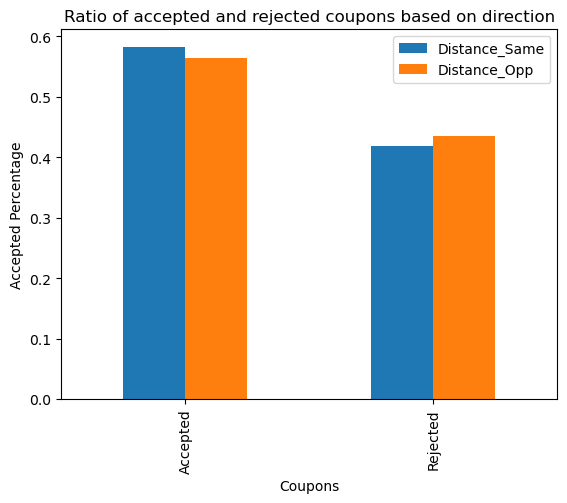

In [1837]:
#Barplot of drivers that accepted vs rejected and those that drive in the same direction or opposite direction.
merged_df.plot(kind='bar', x='Y', y=['proportion_y', 'proportion_x']).set_xticklabels(new_labels)
plt.xlabel('Coupons')
plt.ylabel('Accepted Percentage')
plt.legend(labels=['Distance_Same', 'Distance_Opp'])
new_labels = ["Accepted", "Rejected"]
plt.title('Ratio of accepted and rejected coupons based on direction')
plt.show()

In [1208]:
#Grouping the data to see if there are any new datapoints.
df.groupby(['direction_opp','Y'])['Y'].count()

direction_opp  Y
0              0    1138
               1    1586
1              0    4336
               1    5624
Name: Y, dtype: int64

In [1212]:
df.groupby(['direction_same','direction_opp'])['Y'].count()

direction_same  direction_opp
0               1                9960
1               0                2724
Name: Y, dtype: int64


Would weather impact the rate of acceptance for drivers that were sent the bar coupon?

In [1432]:
bar_coupons_df['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [1438]:
sunny_weather = bar_coupons_df.query('weather == "Sunny"')['Y'].value_counts(normalize=True).reset_index()
sunny_weather

,Y,proportion
0,0,0.558605
1,1,0.441395


In [1442]:
rainy_weather = bar_coupons_df.query('weather == "Rainy"')['Y'].value_counts(normalize=True).reset_index()
rainy_weather

,Y,proportion
0,0,0.637209
1,1,0.362791


In [1444]:
snowy_weather = bar_coupons_df.query('weather == "Snowy"')['Y'].value_counts(normalize=True).reset_index()
snowy_weather

,Y,proportion
0,0,0.682008
1,1,0.317992


In [1464]:
weather_merged_df1 = pd.merge(left=sunny_weather, right=rainy_weather , on='Y', how='left')
weather_merged_finaldf = pd.merge(left=weather_merged_df1, right=snowy_weather , on='Y', how='left')
weather_merged_finaldf

,Y,proportion_x,proportion_y,proportion
0,0,0.558605,0.637209,0.682008
1,1,0.441395,0.362791,0.317992


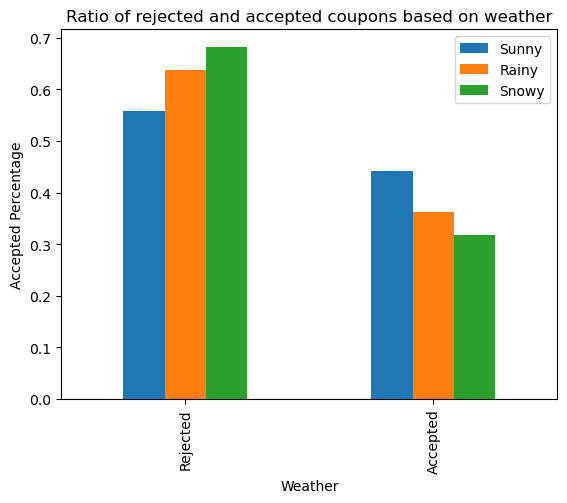

In [1839]:
#sns.barplot(weather_merged_finaldf, x='Y', y=('proportion_x', 'proportion_y'))
new_labels1 = ["Rejected", "Accepted"]
weather_merged_finaldf.plot(kind='bar', x='Y', y=['proportion_x', 'proportion_y', 'proportion']).set_xticklabels(new_labels1)
plt.xlabel('Weather')
plt.ylabel('Accepted Percentage')
plt.legend(labels=['Sunny', 'Rainy', 'Snowy'])
plt.title('Ratio of rejected and accepted coupons based on weather')
plt.show()

In [1636]:
bar_coupons_df['time'].unique()

array(['10AM', '6PM', '7AM', '10PM', '2PM'], dtype=object)

In [1638]:
bar_coupons_df.loc[:,'time'] =bar_coupons_df[['time']].replace({'10AM':'1000'}).replace({'6PM':'1800'}).replace({'7AM':'0700'}).replace({'10PM':'2200'}).replace({'2PM':'1400'})

In [1640]:
bar_coupons_df['time'].unique()

array(['1000', '1800', '0700', '2200', '1400'], dtype=object)

 What about the time of day, did it have an efftect on the acceptance rate for drivers that received the bar and coffee house coupons?

   time  Y  proportion
0  0700  0    0.634497
1  0700  1    0.365503
2  1000  0    0.637387
3  1000  1    0.362613
4  1400  0    0.661017
5  1400  1    0.338983
6  1800  0    0.533569
7  1800  1    0.466431
8  2200  0    0.542289
9  2200  1    0.457711


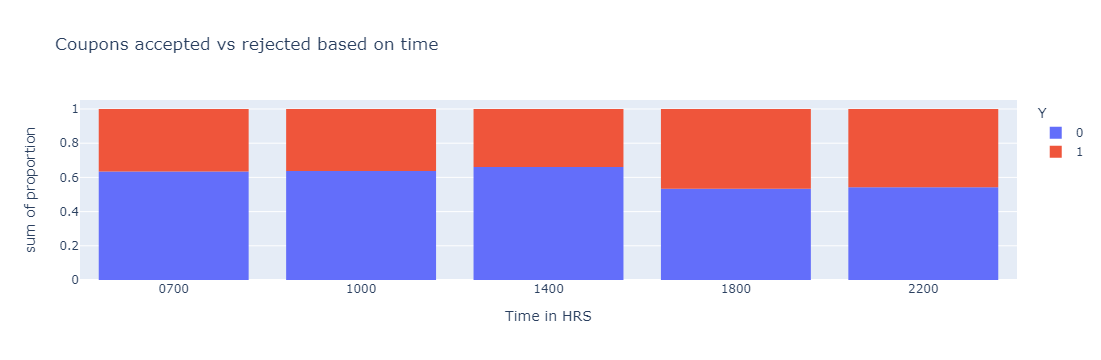

In [1738]:
#The visualization in plotly shows a higher percentage of acceptance when coupons were sent at 6PM and 10PM.
bc = bar_coupons_df.groupby(['time'])['Y'].value_counts(normalize=True).reset_index()
print(bc)
px.histogram(bc, x='time', y='proportion', color='Y', labels={'time':'Time in HRS'}, title='Coupons accepted vs rejected based on time')

In [1740]:
cfhouse_coupons_df['time'].unique()

array(['10AM', '2PM', '6PM', '7AM', '10PM'], dtype=object)

In [1742]:
cfhouse_coupons_df.loc[:,'time'] =cfhouse_coupons_df[['time']].replace({'10AM':'1000'}).replace({'6PM':'1800'}).replace({'7AM':'0700'}).replace({'10PM':'2200'}).replace({'2PM':'1400'})

In [1744]:
cfhouse_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Group
1,No Urgent Place,Friend(s),Sunny,80,1000,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,0,0,0,1,0,Group1
3,No Urgent Place,Friend(s),Sunny,80,1400,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,0,Group1
4,No Urgent Place,Friend(s),Sunny,80,1400,Coffee House,1d,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,0,Group1
12,No Urgent Place,Kid(s),Sunny,55,1800,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,1,Group1
15,Home,Alone,Sunny,80,1800,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,0,0,0,1,0,Group1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,2200,Coffee House,2h,Male,31,Married partner,...,4~8,8+,less1,1,1,0,0,1,0,Group2
12659,Work,Alone,Snowy,30,0700,Coffee House,1d,Male,31,Married partner,...,4~8,8+,less1,1,0,0,1,0,0,Group2
12674,Home,Alone,Rainy,55,2200,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,Group2
12675,Home,Alone,Snowy,30,2200,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,Group2


   time  Y  proportion
0  0700  0    0.554217
1  0700  1    0.445783
2  1000  1    0.640712
3  1000  0    0.359288
4  1400  1    0.547859
5  1400  0    0.452141
6  1800  0    0.587374
7  1800  1    0.412626
8  2200  0    0.575758
9  2200  1    0.424242


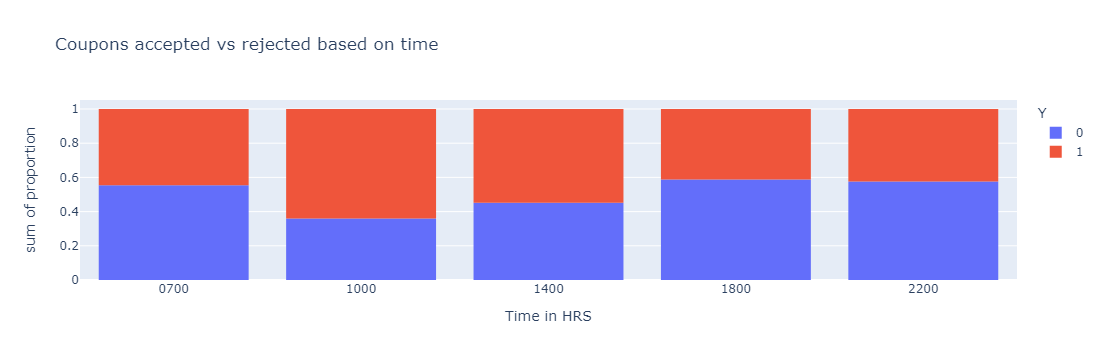

In [1746]:
#The visualization in plotly shows a higher percentage of acceptance when coupons were sent at 10AM and 2PM.
ch = cfhouse_coupons_df.groupby(['time'])['Y'].value_counts(normalize=True).reset_index()
print(ch)
px.histogram(ch, x='time', y='proportion', color='Y', labels={'time':'Time in HRS'}, title='Coupons accepted vs rejected based on time')